# Finite-Element Method

src: Chapra and Canale, Numerical Methods for Engineers. McGraw-Hill 2020. (Chapter 31: Finite-Element Method)

To numerically solve partial differential equation (PDE), we can employ _finite difference_ methods.

**Finite difference method divides the solution domain into a grid of discrete points or nodes.**
Then, PDE is written for each node and its derivatives replaced by finite-divided differences.
Although it can work effectively, one of its major shortcomings is that **it is difficult to apply for systems with irregular geometry, unusual boundary conditions, or heterogenous composition.**

The _finite-element_ method provides an alternative better suited for such scenarios. In contrast to finite-difference methods, the finite-element method divides the solution domain into simply shaped regions, or "elements".
    Approximate solution for the PDE can be developed for each of these elements. The total solution is then generated by linking together, or "assembling" the individual solutions, taking care to ensure continuity at the inter-element boundaries.

## General approach

Conventional finite element steps:

* **Discretization**

  * Divide the solution domain into finite elements.
 
    The points of intersections are called **nodes**.

* **Element equations**

  * Choose a function with unknown coefficients to approximate the solution.

    > Choise of Approximation Functions.
    >
    > Polynomials are often used as approximation functions.
    >
    > E.g., for one-dimensional case, the simplest alternative is:
    >
    > $u(x) = a_0 + a_1 x$.
    >
    > For a line element $[x_1, x_2]$, we have nodes:
    > * $u_1 = u(x_1) = a_0 + a_1 x_1$
    > * $u_2 = u(x_2) = a_0 + a_1 x_2$
    >
    > That is,
    > $a_0 = \frac{u_1 x_2 - u_2 x_1}{x_2 - x_1}$
    > and
    > $a_1 = \frac{u_2 - u_1}{x_2 - x_1}$.
    >
    > Therefore,
    >
    > \begin{align}
    u(x) &= \frac{u_1 x_2 - u_2 x_1}{x_2 - x_1} + \frac{u_2 - u_1}{x_2 - x_1} x \\
    &= \frac{u_1 x_2 - u_2 x_1 + u_2 x - u_1 x}{x_2 - x_1} \\
    &= \frac{u_1 (x_2 - x) + u_2 ( - x_1 + x)}{x_2 - x_1}
    \end{align}
    >
    > Equivalently,
    >
    > $$u = N_1(x) u_1 + N_2(x) u_2$$
    >
    > called "approximation" or "shape" function
    >
    > where "interpolation functions"
    > * $N_1(x) = \frac{x_2 - x}{x_2 - x_1}$  
    > * $N_2(x) = \frac{x - x_1}{x_2 - x_1}$  
  

  * Evaluate the coefficients so that the function approximates the solution in an optimal fashion.

    > Once the approximation function is chosen, the govening equation for the element must be developed.
    > Several methods are available: the most common are the direct approach, the method of weighted residuals, and the variational approach.
    > The resulting element equations will often be a set of linear algebraic equations:
    > $$[k]\{u\} = \{F\}$$
    >
    > where $[k]$ is an _element property_, or _stiffness_, matrix;
    > $\{u\}$ is a column vector of unknowns at the nodes, and
    > $\{F\}$ is a column vector reflecting the effect of any external influences applied at the nodes.
  
* **Assembly**

  * Link the individual element equations together to characterize the unified behavior of the entire system.
 
    * The concept of continuity: the solutions for contiguous elements are matched so that the unknown values at their common nodes are equivalent.
      Thus, the total solution will be continuous.

    > The final assembled system equation may be expressed as:
    >
    > $$[K] \{ u' \} = \{ F' \}$$
    >
    > where $[K]$ is the _assemblage property_ matrix;
    > $\{u'\}$ and $\{F'\}$ are vectors for unknowns and external forces that they are an assemblage of individual element vectors $\{u\}$'s and $\{F\}$'s.

* Account for boundary conditions

  * Modify the system equation to account for the boudnary conditions.

* Solve the system equation

## Example: 1D heat rod

Heating a rod

<div>
    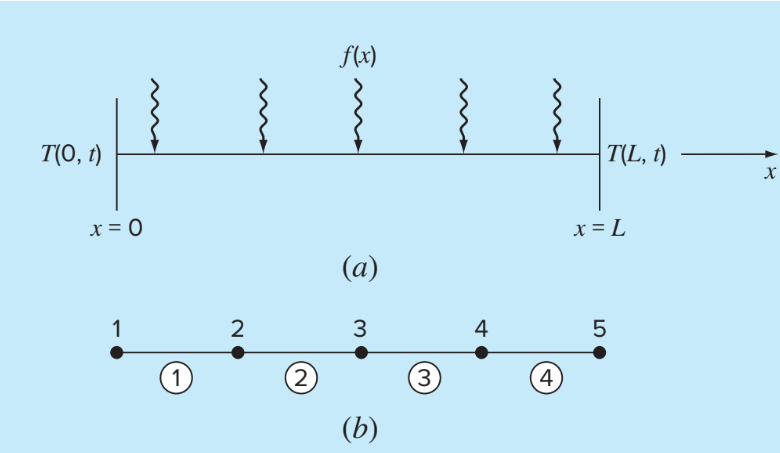
</div>


The governing equation

$$\frac{d^2 T}{d x^2} = - f(x)$$

where
* $f(x)$ is a function defining a heat source along the rod.

The ends of the rod are held at fixed temperatures,

* $T(0) = T_1$
* $T(L) = T_5$

> **Problem**
>
> $$\frac{d^2 T}{d x^2} = - 10$$
> 
> * Uniform heat source $f(x) = 10$.
> * $T(0) = 40$ 
> * $T(10) = 200$


### Analytical solution

> **Analytical solution**
>
> Assume a solution of the form: $T(x) = a x^2 + b x + c$
>
> I.e.,
> 1. $\frac{d^2 T}{d x^2} = 2 a = - 10$
> * $a = -5$
>
> 2. B.C.1: $T(0) = c = 40$
> * $c = 40$
>
> 3. B.C.2: $T(10) = -5 (10)^2 + b (10) + 40 = 200$
> * $b = 66$
>
> That is,
> $T(x) = -5 x^2 + 66 x + 40$


In [1]:
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Heated rod')

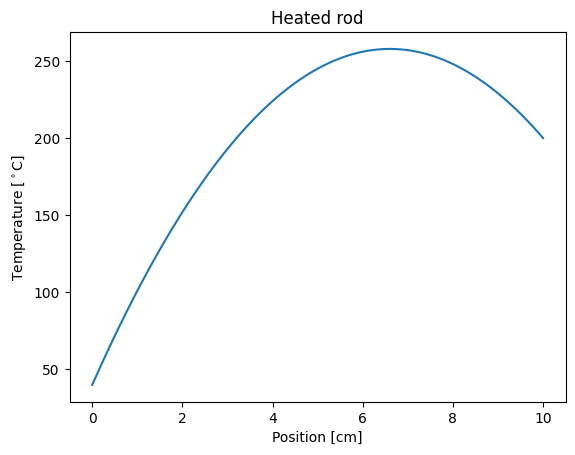

In [2]:
xs = np.linspace(0, 10, 500)
T = lambda x: -5 * x**2 + 66*x + 40

plt.plot(xs, T(xs), label='Analytical')
plt.xlabel('Position [cm]')
plt.ylabel('Temperature [$^\circ$C]')
plt.title('Heated rod')

### Weighted residuals

> 1. Discretization
>
>    Line section element:
>    | Node | Position | Remark |
>    |---   |---       |---     |
>    | 1    | $x=0$    |        |
>    | 2    | $x=2.5$    |        |
>    | 3    | $x=5$    |        |
>    | 4    | $x=7.5$    |        |
>    | 5    | $x=10$    |        |
>
> Note that for FEM, we can choose element to be irregular. But we will keep it simple (regular) here.


> 2. Element
>
> 2.1. Approximation function
>
> Linear function $\tilde{T}(x) = N_1(x) T_1 + N_2(x) T_2$
>
> where $T_1$ and $T_2$ are temperatures at the element ends,
> $N_1(x)$ and $N_2(x)$ are linear interpolation functions of the element. 

> 2.2. Element equation
>
> The governing equation can be re-arranged to:
> \begin{align}
\frac{d^2 T}{d x^2} = -f(x) \\
\frac{d^2 T}{d x^2} + f(x) = 0
\end{align}
>
> With the approximation, LHS may not go to zero:
>
> $\frac{d^2 \tilde{T}}{d x^2} + f(x) = R$
>
> where $R$ is **the residual** (the closer to zero, the better our approximation $\tilde{T}$ is).


> The method of weighted residual is to find the approximation $\tilde{T}$ (which in turn encapsulates unknowns: nodal temperatures) such that
>
> $$\int_{x \in X} R(x) W_i(x) d x = 0$$
>
> , for all $i = 1, 2, \ldots, M$,
>
> where
>
> * $W_i(x)$ is the weighting function, for which linear interpolation $N_i(x)$ is often used;
>
> * $X$ is the solution domain;
>
> * $M$ is the number of nodes in the element.
>
> > (My opinion) Rationale is that if we can find an approximation such that this is true for many weighting functions, the approximation should be good enough. 

> For the heated rod problem and choosing linear interpolations as weighting functions,
>
> $\int_{x_1}^{x_2} R(x) N_i(x) d x = 0$
>
> for $i = 1, 2$.

> \begin{align}
\int_{x_1}^{x_2} R(x) N_i(x) d x &= 0 \\
\int_{x_1}^{x_2} \left[ \frac{d^2 \tilde{T}}{d x^2} + f(x) \right] N_i(x) d x &= 0 \\
\int_{x_1}^{x_2} \frac{d^2 \tilde{T}}{d x^2} N_i(x) d x &= - \int_{x_1}^{x_2} f(x) N_i(x) d x \\
\end{align}

> Recall integration by parts:
>
> $$\int_a^b u dv = \left. u v \right|_a^b - \int_a^b v du$$

> Choose 
> * $\frac{d^2 \tilde{T}}{d x^2} d x$ as $dv$
> * $N_i(x)$ as $u$
>
> Therefore,
> \begin{align}
\int_{x_1}^{x_2} \frac{d^2 \tilde{T}}{d x^2} N_i(x) d x &= - \int_{x_1}^{x_2} f(x) N_i(x) d x \\
\left[N_i(x) \frac{d \tilde{T}}{d x}\right]_{x_1}^{x_2}
-\int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} \frac{d N_i(x)}{d x} d x
&= - \int_{x_1}^{x_2} f(x) N_i(x) d x \\
\end{align}
>
> for $i = 1, 2$.

> So, we have
> \begin{align}
\left[N_1(x) \frac{d \tilde{T}}{d x}\right]_{x_1}^{x_2}
-\int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} \frac{d N_1(x)}{d x} d x
&= - \int_{x_1}^{x_2} f(x) N_1(x) d x \\
\end{align}
>
> and
> \begin{align}
\left[N_2(x) \frac{d \tilde{T}}{d x}\right]_{x_1}^{x_2}
-\int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} \frac{d N_2(x)}{d x} d x
&= - \int_{x_1}^{x_2} f(x) N_2(x) d x \\
\end{align}

> Recall that linear interpolation 
> * $N_1(x) = \frac{x_2 - x}{x_2 - x_1}$
>   * $N_1(x_1) = 1$ and $N_1(x_2) = 0$
>   * $\frac{d N_1(x)}{d x} = -\frac{1}{x_2 - x_1}$
>
> * $N_2(x) = \frac{x - x_1}{x_2 - x_1}$
>   * $N_2(x_1) = 0$ and $N_2(x_2) = 1$
>   * $\frac{d N_2(x)}{d x} = \frac{1}{x_2 - x_1}$


> That is,
>
> \begin{align}
-\frac{d \tilde{T}(x_1)}{d x}
+\int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} \frac{1}{x_2 - x_1} d x
&= - \int_{x_1}^{x_2} f(x) N_1(x) d x \\
\frac{1}{x_2 - x_1} \int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} d x
&= - \int_{x_1}^{x_2} f(x) N_1(x) d x + \frac{d \tilde{T}(x_1)}{d x}\\
\frac{\tilde{T}(x_2) - \tilde{T}(x_1)}{x_2 - x_1}
&= - \int_{x_1}^{x_2} f(x) N_1(x) d x + \frac{d \tilde{T}(x_1)}{d x}
\end{align}
>
> and
> \begin{align}
\frac{d \tilde{T}(x_2)}{d x}
-\int_{x_1}^{x_2} \frac{d \tilde{T}}{d x} \frac{1}{x_2 - x_1} d x
&= - \int_{x_1}^{x_2} f(x) N_2(x) d x \\
-\frac{\tilde{T}(x_2) - \tilde{T}(x_1)}{x_2 - x_1} &= - \int_{x_1}^{x_2} f(x) N_2(x) d x - \frac{d \tilde{T}(x_2)}{d x}\\
\end{align}

> Let's denote approximate temperates at the element nodes $T_1 \equiv \tilde{T}(x_1)$
and $T_2 \equiv \tilde{T}(x_2)$.
>
> We have
>
> \begin{align}
\underbrace{\frac{1}{x_2 - x_1} \begin{bmatrix}
-1 & 1 \\
1 & -1
\end{bmatrix}}_{[k]}
\underbrace{\begin{bmatrix}
T_1 \\ T_2
\end{bmatrix}}_{\{u\}}
=
\underbrace{\begin{bmatrix}
- \int_{x_1}^{x_2} f(x) N_1(x) d x  \\
- \int_{x_1}^{x_2} f(x) N_2(x) d x 
\end{bmatrix}}_{\text{External effect}}
+
\underbrace{\begin{bmatrix}
\frac{d \tilde{T}(x_1)}{d x} \\
- \frac{d \tilde{T}(x_2)}{d x}
\end{bmatrix}}_{\text{Element boundary condition}}
\end{align}

> Let's consider 
> 
> \begin{align}
\int_{x_1}^{x_2} f(x) N_i(x) dx &= 10 \int_{x_1}^{x_2} N_i(x) dx
\end{align}
>
> For $i = 1$,
> \begin{align}
\int_{x_1}^{x_2} f(x) N_1(x) dx &= 10 \int_{x_1}^{x_2} \frac{x_2 - x}{x_2 - x_1} dx \\
&= 10 \left.\frac{x_2}{x_2 - x_1} x \right|_{x_1}^{x_2}  - \frac{1}{x_2 - x_1} \int_{x_1}^{x_2} x  dx \\
&= 10 \left.\frac{x_2}{x_2 - x_1} x \right|_{x_1}^{x_2}  - 10 \left.\frac{1}{2 (x_2 - x_1)}  x^2 \right|_{x_1}^{x_2} \\
\end{align}
> 
> For $i = 2$,
> \begin{align}
\int_{x_1}^{x_2} f(x) N_1(x) dx &= 10 \int_{x_1}^{x_2} \frac{x - x_1}{x_2 - x_1} dx \\
&= 10 \left.\frac{1}{2 (x_2 - x_1)}  x^2 \right|_{x_1}^{x_2} dx - 10 \left.\frac{x_1}{x_2 - x_1} x \right|_{x_1}^{x_2} \\
\end{align}


>    | Node | Position | Element |
>    |---   |---       |---     |
>    | 1    | $x'=0$    | $x_1 = 0$ ; $x_2 = 0$   |
>    | 2    | $x'=2.5$  | $x_1 = 0$ ; $x_2 = 0$   |
>    | 3    | $x'=5$    | $x_1 = 0$ ; $x_2 = 0$   |
>    | 4    | $x'=7.5$  | $x_1 = 0$ ; $x_2 = 0$   |
>    | 5    | $x'=10$   |        |


>For $i = 1$,
>\begin{align}
\int_{x_1}^{x_2} f(x) N_1(x) dx 
&= 10 \left.\frac{x_2}{x_2 - x_1} x \right|_{x_1}^{x_2}  - 10 \left.\frac{1}{2 (x_2 - x_1)}  x^2 \right|_{x_1}^{x_2} dx \\
&= 10 \left. x \right|_{0}^{2.5}  - 10 \left.\frac{1}{2 (2.5 - 0)}  x^2 \right|_{0}^{2.5} =  25 - 2 (2.5)^2 = 25 - 2(6.25) = 12.5\\
\end{align}
>
>For $i = 2$,
>\begin{align}
\int_{x_1}^{x_2} f(x) N_1(x) dx 
&= 10 \left.\frac{1}{2 (x_2 - x_1)}  x^2 \right|_{x_1}^{x_2} dx - 10 \left.\frac{x_1}{x_2 - x_1} x \right|_{x_1}^{x_2} \\
&= 10 \left.\frac{1}{2 (2.5 - 0)}  x^2 \right|_{0}^{2.5} dx - 10 \left.\frac{0}{x_2 - x_1} x \right|_{x_1}^{x_2} = 12.5
\end{align}


> For element $i$,
>
> \begin{align}
\begin{bmatrix}
-0.4 & 0.4 \\
0.4 & -0.4
\end{bmatrix}
\begin{bmatrix}
T_1 \\ T_2
\end{bmatrix}
=
\begin{bmatrix}
- 12.5 + \frac{d \tilde{T}(x_1)}{d x} \\
- 12.5 - \frac{d \tilde{T}(x_2)}{d x}
\end{bmatrix} \\
\underbrace{\begin{bmatrix}
0.4 & -0.4 \\
-0.4 & 0.4
\end{bmatrix}}_{[k]}
\underbrace{\begin{bmatrix}
T_1 \\ T_2
\end{bmatrix}}_{\{u\}}
=
\underbrace{\begin{bmatrix}
12.5 - \frac{d \tilde{T}(x_1)}{d x} \\
12.5 + \frac{d \tilde{T}(x_2)}{d x}
\end{bmatrix}}_{\{F\}}
\end{align}

> 3. Assemblage
>
> Globalize indices

>    | Element | Local | Global |
>    |---     |--- |--- |
>    | 1   | 1, 2 | 1, 2 |
>    | 2   | 1, 2 | 2, 3 |
>    | 3   | 1, 2 | 3, 4 |
>    | 4   | 1, 2 | 4, 5 |
>    
   

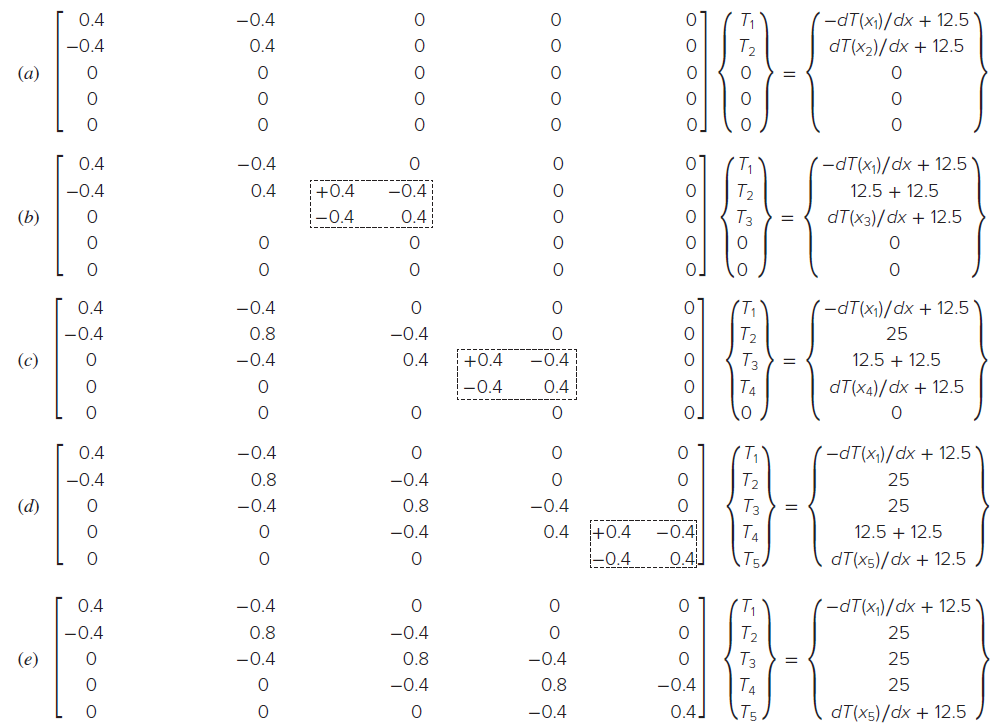

> \begin{align}
\underbrace{\begin{bmatrix}
0.4 & -0.4 & 0 & 0 & 0 \\
-0.4 & 0.8 & -0.4 & 0 & 0 \\
0 & -0.4 & 0.8 & -0.4 & 0 \\
0 & 0 & -0.4 & 0.8 & -0.4 \\
0 & 0 & 0 & -0.4 & 0.4
\end{bmatrix}}_{[K]}
\underbrace{\begin{bmatrix}
T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5
\end{bmatrix}}_{\{u'\}}
=
\underbrace{\begin{bmatrix}
-d \tilde{T}(x_1)/dx + 12.5 \\
25 \\
25 \\
25 \\
d \tilde{T}(x_5)/dx + 12.5
\end{bmatrix}}_{\{F'\}}
\end{align}

> 4. Account for the boundary conditions
>
> * $T_1 = 40$
> * $T_5 = 200$
>
> Hence $T_1$ and $T_5$ are no longer unknowns, switch places with unknowns $d\tilde{T}(x_1)/dt$ and $d\tilde{T}(x_5)/dt$
>
> \begin{align}
\begin{bmatrix}
0.4 & -0.4 & 0 & 0 & 0 \\
-0.4 & 0.8 & -0.4 & 0 & 0 \\
0 & -0.4 & 0.8 & -0.4 & 0 \\
0 & 0 & -0.4 & 0.8 & -0.4 \\
0 & 0 & 0 & -0.4 & 0.4
\end{bmatrix}
\begin{bmatrix}
40 \\ T_2 \\ T_3 \\ T_4 \\ 200
\end{bmatrix}
=
\begin{bmatrix}
-d \tilde{T}(x_1)/dx + 12.5 \\
25 \\
25 \\
25 \\
d \tilde{T}(x_5)/dx + 12.5
\end{bmatrix}
\end{align}
>
>\begin{align}
\begin{bmatrix}
1 & -0.4 & 0 & 0 & 0 \\
0 & 0.8 & -0.4 & 0 & 0 \\
0 & -0.4 & 0.8 & -0.4 & 0 \\
0 & 0 & -0.4 & 0.8 & 0 \\
0 & 0 & 0 & -0.4 & -1
\end{bmatrix}
\begin{bmatrix}
d \tilde{T}(x_1)/dx \\ T_2 \\ T_3 \\ T_4 \\ d \tilde{T}(x_5)/dx
\end{bmatrix}
=
\begin{bmatrix}
12.5 - 0.4(40) = -3.5\\
25 + 0.4(40) = 41\\
25 \\
25 + 0.4(200) = 105\\
12.5 - 0.4(200) = -67.5
\end{bmatrix}
\end{align}

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
K = np.array([[1, -0.4, 0, 0, 0],
              [0, 0.8, -0.4, 0, 0],
              [0, -0.4, 0.8, -0.4, 0],
              [0, 0, -0.4, 0.8, 0],
              [0, 0, 0, -0.4, -1]])

F = np.array([-3.5, 41, 25, 105, -67.5]).reshape((-1,1))

Ts = np.linalg.solve(K, F)
Ts

array([[ 66.  ],
       [173.75],
       [245.  ],
       [253.75],
       [-34.  ]])

In [15]:
K @ Ts - F

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.42108547e-14]])

In [18]:
xs = np.array([0, 2.5, 5, 7.5, 10])
Ts[0,0] = 40    # BC 1
Ts[-1,0] = 200  # BC 2
Ts

array([[ 40.  ],
       [173.75],
       [245.  ],
       [253.75],
       [200.  ]])

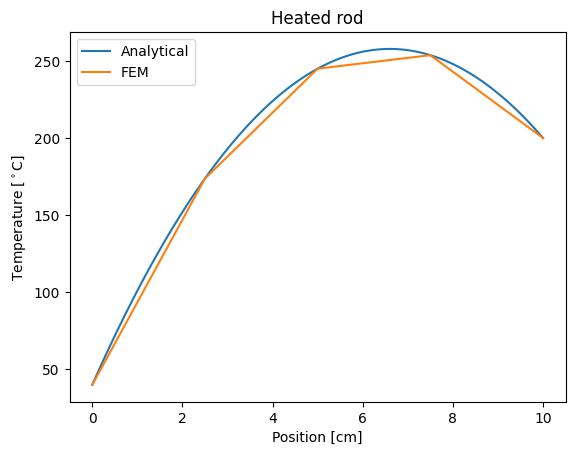

In [19]:
xs = np.linspace(0, 10, 500)
T = lambda x: -5 * x**2 + 66*x + 40

plt.plot(xs, T(xs), label='Analytical')

xs = np.array([0, 2.5, 5, 7.5, 10])
plt.plot(xs, Ts, label='FEM')
plt.xlabel('Position [cm]')
plt.ylabel('Temperature [$^\circ$C]')
plt.title('Heated rod')
plt.legend()

### Debug

In [20]:
def Tapprox(x, x1, x2, t1, t2):
    tx = (x2 - x)/(x2 - x1)*t1 + (x - x1)/(x2 - x1)*t2
    return tx    

In [21]:
def residual(x, Tf, dx):
    dTdx1 = (Tf(x + dx) - Tf(x - dx))/(2*dx)
    dTdx2 = (Tf(x + 2*dx) - Tf(x))/(2*dx)
    d2T = (dTdx2 - dTdx1)/dx

    return d2T + 10

dx = 0.00501002004008016
np.sum(rs*N1*dx)=12.52505010020701
np.sum(rs*N2*dx)=12.525050100253063
dx = 2.5
np.sum(rs*N1*dx)=24.999999999911182
np.sum(rs*N2*dx)=25.00000000035527


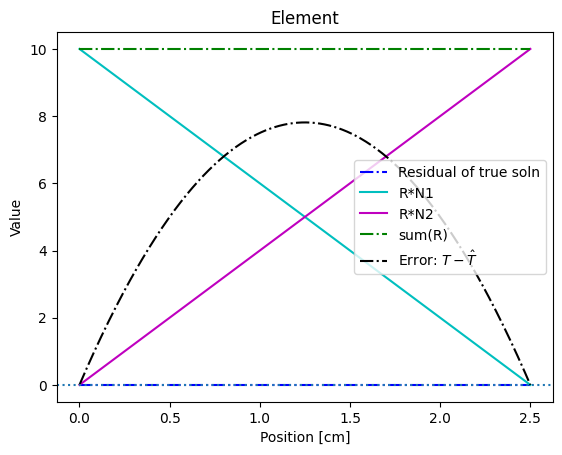

In [23]:
xs = np.linspace(0, 2.5, 500)
T = lambda x: -5 * x**2 + 66*x + 40

# plt.plot(xs, T(xs), label='Analytical')

Ta = Tapprox(xs, 0, 2.5, Ts[0], Ts[1])
# plt.plot(xs, Ta, 'k', label='Tappx')

Ttilde = lambda x: Tapprox(x, 0, 2.5, Ts[0], Ts[1])
rs = residual(xs, Ttilde, 0.01)
# plt.plot(xs, rs, 'g', label='Residual')

rs_true = residual(xs, T, 0.01)
plt.plot(xs, rs_true, 'b-.', label='Residual of true soln')

N1 = (2.5 - xs)/2.5
N2 = xs/2.5
plt.plot(xs, rs*N1, 'c', label='R*N1')
plt.plot(xs, rs*N2, 'm', label='R*N2')

plt.plot(xs, rs*N1 + rs*N2, 'g-.', label='sum(R)')
plt.plot(xs, T(xs)-Ta, 'k-.', label='Error: $T - \hat{T}$')


dx = xs[1] - xs[0]
print('dx =', dx)
print(f'{np.sum(rs*N1*dx)=}')
print(f'{np.sum(rs*N2*dx)=}')

dx = 2.5
xs = np.linspace(0, 2.5, 2)
rs = residual(xs, Ttilde, 0.01)
N1 = (2.5 - xs)/2.5
N2 = xs/2.5
print('dx =', dx)
print(f'{np.sum(rs*N1*dx)=}')
print(f'{np.sum(rs*N2*dx)=}')


plt.axhline(y=0, ls=':')

plt.xlabel('Position [cm]')
plt.ylabel('Value')
plt.title('Element')
plt.legend()

Notice

* Residual or weighted residual does not go to zero, not even at the nodes.
  * Note that the approximation $\tilde{T}$ does not match the slope, so it cannot deliver zero residual, even at the node.
  * How can it satisfy the equations then?
    * 1. The solution satisfies the system equation $[K]\{u'\} = \{F'\}$.
    * 2. The residuals are considered at element level and then they get combined: adding cross-effects from neighboring elements.
* Even sum of weighted residual does not seem to be close to zero either!

## Note

Other weighting functions:

* Colloaction method: $W_i = \delta(x - x_i$ ("Dirac function")
  * $\int_{x_1}^{x_2} R W_i d x = 0$ $\Rightarrow R(x_i) = 0$ for $i = 1, \ldots, n$.



* Subdomain method: $W_i = 1$
  * $\int_{x_1}^{x_2} R W_i d x = 0$ $\Rightarrow \int_{x_1}^{x_2} R d x = 0$ for $i = 1, \ldots, n$.


* Least-square method:
  * Minimize the integral of the square of the residual
    * $\min \int R^2 dx $ $\Rightarrow W_i = \frac{\partial R}{\partial a_i}$
    * $\int_{x_1}^{x_2} R W_i d x = 0$

      \begin{align}
      \Rightarrow \int_{x_1}^{x_2} R \frac{\partial R}{\partial a_i} d x &= 0 \\
      \frac{\partial }{\partial a_i} \int_{x_1}^{x_2} R^2 d x &= 0 \\
      \end{align}

       for $i = 1, \ldots, n$.

       * Recall that $\frac{\partial }{\partial a_i} \int_{x_1}^{x_2} R^2 d x = 0$ is FONC for minimal $\int_{x_1}^{x_2} R^2 d x$.


## Example: Linear ODE

$$\frac{d C}{d x} = -0.5 C$$

* I.C. $C(0) = 3$

Analytical solution:

$C(x) = C(0) e^{-0.5 x} = 3 e^{-0.5 x}$

C(10)=0.0202


Text(0, 0.5, 'C')

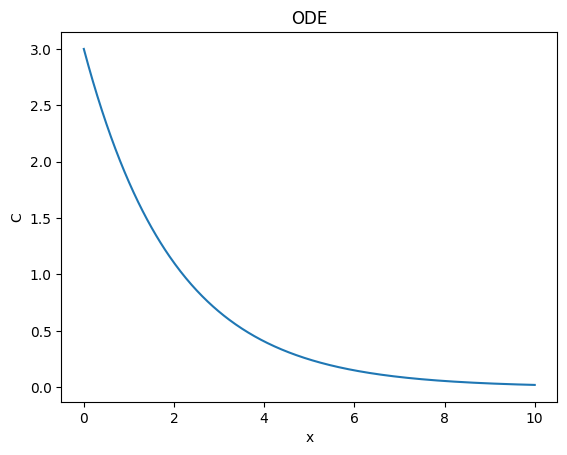

In [41]:
import numpy as np
from matplotlib import pyplot as plt

xs = np.linspace(0, 10, 500)

C = lambda x: 3*np.exp(-0.5*x)

print(f'{C(10)=:.4f}')

plt.plot(xs, C(xs))
plt.title('ODE')
plt.xlabel('x')
plt.ylabel('C')

### Weighted residuals

#### Discretization

1. Discretization

Line element $x_2 - x_1 = h$


#### Element

2. Element

2.1. Linear $\tilde{C}(x) = N_1(x) c_1 + N_2(x) c_2$

where "linear interpolators": 

* $N_1(x) = \frac{h - x}{h}$
     
* $N_2(x) = \frac{x}{h}$

2.2. Residual

\begin{align}
R &= \frac{d \tilde{C}}{d x} + 0.5 \tilde{C} \\
\end{align}


Weak form

$$\int_{x_1}^{x_2} R(x) W_i(x) dx = 0$$

for 2 nodes: $i = 1, 2$.

That is,

\begin{align}
\int_{x_1}^{x_2} R(x) W_i(x) dx &= 0 \\
\int_{x_1}^{x_2} \left( \frac{d \tilde{C}}{d x} + 0.5 \tilde{C} \right) W_i(x) dx &= 0 \\
\end{align}

Work the math to put it in terms of nodal parameters:

\begin{align}
\int_{x_1}^{x_2} \left( \frac{d \left[ N_1(x) c_1 + N_2(x) c_2 \right]}{d x} + 0.5 \left[ N_1(x) c_1 + N_2(x) c_2 \right] \right) W_i(x) dx &= 0 \\
\int_{x_1}^{x_2} \left( c_1 \frac{d N_1}{dx} + c_2 \frac{d N_2}{dx} + a c_1 N_1 + a c_2 N_2 \right) W_i dx &= 0 \\
\int_{x_1}^{x_2} \left( c_1 (-\frac{1}{h}) + c_2 (\frac{1}{h}) + a c_1 N_1 + a c_2 N_2 \right) W_i dx &= 0
\end{align}



Choose $N_i(x)$ as $W_i(x)$:

\begin{align}
\int_{x_1}^{x_2} \left( c_1 (-\frac{1}{h}) + c_2 (\frac{1}{h}) + a c_1 N_1 + a c_2 N_2 \right) N_i dx &= 0 \\
c_1 \int_{x_1}^{x_2}\left( -\frac{1}{h} N_i + a N_i N_1 \right) dx
+ c_2 \int_{x_1}^{x_2}\left( \frac{1}{h} N_i + a N_i N_2 \right) dx &= 0
\end{align}


For $i = 1$,

\begin{align}
c_1 \int_{x_1}^{x_2}\left( -\frac{1}{h} N_1 + a N_1^2 \right) dx
+ c_2 \int_{x_1}^{x_2}\left( \frac{1}{h} N_1 + a N_1 N_2 \right) dx &= 0 \\
\end{align}

> Plug in $N_1(x)$, $N_2(x)$ and let $x_1 = 0$ and $x_2 = h$, we will get
> \begin{align}
c_1 \int_{x_1}^{x_2}\left( -\frac{1}{h} \left( \frac{h - x}{h} \right) + a \left( \frac{h - x}{h} \right)^2 \right) dx
+ c_2 \int_{x_1}^{x_2}\left( \frac{1}{h} \left( \frac{h - x}{h} \right) + a \left( \frac{h - x}{h} \right) \left( \frac{x}{h} \right) \right) dx &= 0 \\
c_1 \left( - \frac{1}{2} + \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right) &= 0
\end{align}


For $i = 2$,

\begin{align}
c_1 \int_{x_1}^{x_2}\left( -\frac{1}{h} N_2 + a N_1 N_2 \right) dx
+ c_2 \int_{x_1}^{x_2}\left( \frac{1}{h} N_2 + a N_2^2 \right) dx &= 0
\end{align}

> Plug in $N_1(x)$, $N_2(x)$ and let $x_1 = 0$ and $x_2 = h$, we will get
> \begin{align}
c_1 \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) &= 0
\end{align}


Here, we have the two element equations for two unknowns:
* $c_1 \left( - \frac{1}{2} + \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right) = 0$
* $c_1 \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) = 0$


We don't need to assemble the systeme equation. We have enough.
But, we still need to account for the boundary condition: $C(0) = 3$ though.


With $C(0) = c_1 = 3$, so we have

\begin{align}
(3) \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) &= 0 \\
c_2 = -(3) \frac{ - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} }{\frac{1}{2} + \frac{a h}{3}}
\end{align}


Since this is one-sided boundary condition, we start from one-side and move forward to the other.

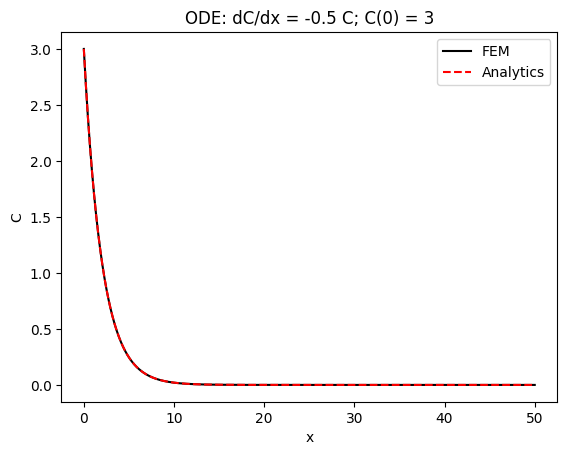

In [55]:
h = 0.001
a = 0.5
N = 50000

Cs = [3]
C1 = Cs[0]
for n in range(N):    
    k11 = - 1/2 + a*h/3
    k12 = 1/2 + a*h/2 - a*h/3
    k21 = -1/2 + a*h/2 - a*h/3
    k22 = 1/2 + a*h/3
    
    C2 = -k21*C1/k22
    Cs.append(C2)
    # Next round
    C1 = C2


xs = np.linspace(0, N*h, N)
plt.plot(ts, Cs[:N], 'k-', label='FEM')
plt.plot(ts, C(xs),'r--', label='Analytics')
plt.title('ODE: dC/dx = -0.5 C; C(0) = 3')
plt.xlabel('x')
plt.ylabel('C')
plt.legend()


# Linear ODE with Forcing

$$\frac{d C}{d x} + 0.5 C = 0.2 \sin(20 \pi x)$$

* I.C. $C(0) = 0.3$

Analytical solution

* $C_h(x) = A e^{-0.5 x}$

* $C_p(x) = B_1 \sin(20 \pi x) + B_2 \cos(20 \pi x)$

\begin{align}
\frac{d C}{d x} + 0.5 C &= 0.2 \sin(20 \pi x) \\
\frac{d (B_1 \sin(20 \pi x) + B_2 \cos(20 \pi x))}{d x} + 0.5 B_1 \sin(20 \pi x) + 0.5 B_2 \cos(20 \pi x) &= 0.2 \sin(20 \pi x) \\
20 \pi B_1 \cos(20 \pi x) - 20 \pi B_2 \sin(20 \pi x)
+ 0.5 B_1 \sin(20 \pi x) + 0.5 B_2 \cos(20 \pi x)
&= 0.2 \sin(20 \pi x) \\
\end{align}


* $20 \pi B_1 \cos(20 \pi x) + 0.5 B_2 \cos(20 \pi x) = 0$

* $- 20 \pi B_2 \sin(20 \pi x) + 0.5 B_1 \sin(20 \pi x) = 0.2 \sin(20 \pi x)$

\begin{align}
\begin{bmatrix}
20 \pi & 0.5 \\
0.5 & -20 \pi
\end{bmatrix}
\begin{bmatrix}
B_1 \\ B_2
\end{bmatrix}
&= 
\begin{bmatrix}
0 \\ 0.2
\end{bmatrix}
\end{align}

In [4]:
import numpy as np
from matplotlib import pyplot as plt

A = np.array([[20*np.pi, 0.5],
              [0.5, -20*np.pi]])

b = np.array([0, 0.2]).reshape((-1,1))

Bs = np.linalg.solve(A, b)
Bs

array([[ 2.5328692e-05],
       [-3.1828973e-03]])

Analytical solution

* $C_h(x) = A e^{-0.5 x}$

* $C_p(x) = 0.0000253 \sin(20 \pi x) - 0.00318 \cos(20 \pi x)$

Complete solution

* $C(x) = A e^{-0.5 x} + 0.0000253 \sin(20 \pi x) - 0.00318 \cos(20 \pi x)$

Boundary condition:

* $C(0) = 0.3 = A + 0 - 0.00318$, so $A = 0.30318$

The solution is:

\begin{align}
C(x) &= 0.30318 e^{-0.5 x} + 0.0000253 \sin(20 \pi x) - 0.00318 \cos(20 \pi x)\\
&\approx  
0.30318 e^{-0.5 x} - 0.00318 \cos(20 \pi x)
\end{align}

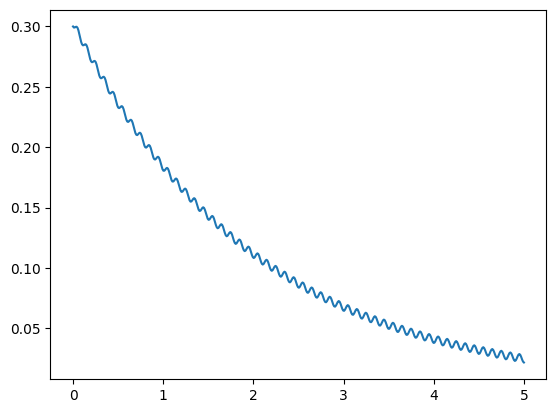

In [5]:
Cana = lambda x: 0.30318*np.exp(-0.5*x) - 0.00318*np.cos(20*np.pi*x) + 0.0000253*np.sin(20*np.pi*x)

# Cana = lambda x: 0.30318*np.exp(-0.5*x) - 0.00318*np.cos(20*np.pi*x)

xs = np.linspace(0, 5, 500)
plt.plot(xs, Cana(xs))

## Euler

$$\frac{d C}{d x} = - 0.5 C + 0.2 \sin(20 \pi x)$$

* I.C. $C(0) = 0.3$

MSE:  5.39081162935797e-07


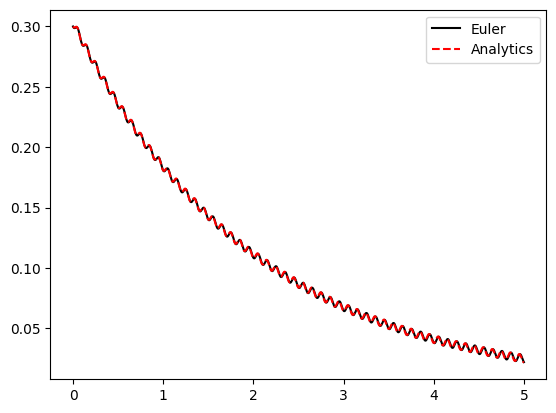

In [6]:
h = 0.005
N = 1000

C = 0.3
Cs = [C]
x = 0

for n in range(N):
    C = C + (- 0.5 * C + 0.2 * np.sin(20*np.pi*x)) * h

    Cs.append(C)
    x += h

xs = np.linspace(0, N*h, N)
plt.plot(xs, Cs[:N], 'k-', label='Euler')


Anas = Cana(xs)

plt.plot(xs, Anas, 'r--', label='Analytics')

print('MSE: ', np.mean( (Anas - np.array(Cs[:N]))**2 ))

plt.legend()

## Weighted residuals

\begin{align}
R &= \frac{d \tilde{C}}{d x} + 0.5 \tilde{C} - 0.2 \sin(20 \pi x ) \\
\end{align}


\begin{align}
\int_{x_1}^{x_2} R(x) W_i(x) dx &= 0 \\
\int_{x_1}^{x_2} \left( \frac{d \tilde{C}}{d x} + 0.5 \tilde{C} - 0.2 \sin(20 \pi x ) \right) W_i(x) dx &= 0 \\
\int_{x_1}^{x_2} \left( \frac{d \tilde{C}}{d x} + 0.5 \tilde{C}  \right) W_i(x) dx &= \int_{x_1}^{x_2} 0.2 \sin(20 \pi x ) W_i(x) dx
\end{align}

Similar to what we have in the non-forcing example, except RHS is not zeros, 
so

* $c_1 \left( - \frac{1}{2} + \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right) = \int_{x_1}^{x_2} 0.2 \sin(20 \pi x ) N_1(x) dx$
* $c_1 \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) = \int_{x_1}^{x_2} 0.2 \sin(20 \pi x ) N_2(x) dx$



This forcing term has $x$ going beyond an individual element.
Any term dealing with $x$ has to be carefully handled here: global value.

* $c_1 \left( - \frac{1}{2} + \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right) = 0.2 \int_{x_1}^{x_2} \sin(20 \pi x ) (\frac{x_2 - x}{x_2 - x_1}) dx$
* $c_1 \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) = 0.2 \int_{x_1}^{x_2} \sin(20 \pi x ) (\frac{x - x_1}{x_2 - x_1}) dx$


Since we will be using only one equation, we will work on just one, the lower one.

\begin{align}
c_1 \left( - \frac{1}{2} + \frac{a h}{2} - \frac{a h}{3} \right)
+ c_2 \left( \frac{1}{2} + \frac{a h}{3} \right) = \frac{0.2}{h} \int_{x_1}^{x_2} \sin(20 \pi x ) (x - x_1) dx \\
= \frac{0.2}{h} \int_{x_1}^{x_2} \sin(20 \pi x ) x dx - x_1 \frac{0.2}{h} \int_{x_1}^{x_2} \sin(20 \pi x) dx
\end{align}



\begin{align}
= \frac{0.2}{h} \int_{x_1}^{x_2} \sin(20 \pi x ) x dx - x_1 \frac{0.2}{h} \int_{x_1}^{x_2} \sin(20 \pi x) dx \\
= \frac{0.2}{h} \left.\left( -\frac{x}{20 \pi} \cos(20 \pi x) + \frac{\sin(20 \pi x)}{(20 \pi)^2} \right)\right|_{x_1}^{x_2} + \left. x_1 \frac{0.2}{20 \pi h} \cos(20 \pi x)\right|_{x_1}^{x_2} 
\end{align}


Forcing effect

\begin{align}
= \frac{0.2}{h} \left( -\frac{x_2}{20 \pi} \cos(20 \pi x_2) + \frac{\sin(20 \pi x_2)}{(20 \pi)^2} + \frac{x_1}{20 \pi} \cos(20 \pi x_1) - \frac{\sin(20 \pi x_1)}{(20 \pi)^2} \right) \\
+  x_1 \frac{0.2}{20 \pi h} \left( \cos(20 \pi x_2) -  \cos(20 \pi x_1) \right) 
\end{align}




Note: functions cosine and sine here have to get the value of $x$. We cannot use local version of $x$ here.



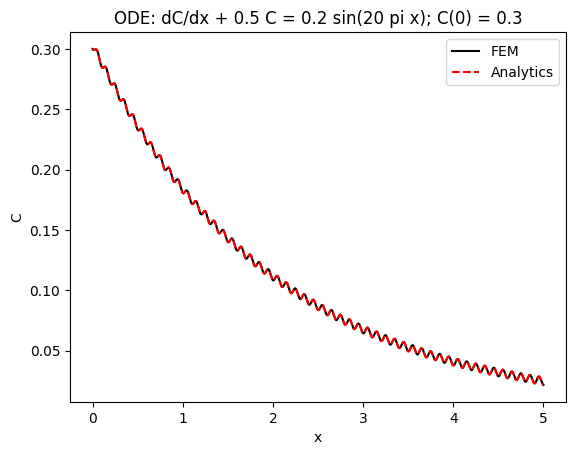

In [18]:
import numpy as np
from matplotlib import pyplot as plt

h = 0.001
a = 0.5
N = 5000

Cs = [0.3]
C1 = Cs[0]

w = 20*np.pi
f0 = 0.2/h
f1 = f0*1/w
f2 = f0*1/w**2

x = 0

for n in range(N):    
    k11 = - 1/2 + a*h/3
    k12 = 1/2 + a*h/2 - a*h/3
    k21 = -1/2 + a*h/2 - a*h/3
    k22 = 1/2 + a*h/3

    x1 = x
    x2 = x + h

    # Forcing effect
    F2 = -f1*x2*np.cos(w*x2) + f2*np.sin(w*x2) \
         + f1*x1*np.cos(w*x1) - f2*np.sin(w*x1) \
         + f1*x1*(np.cos(w*x2) - np.cos(w*x1))
    
    C2 = (F2 -k21*C1)/k22
    Cs.append(C2)
    # Next round
    C1 = C2
    x += h


xs = np.linspace(0, N*h, N)
plt.plot(xs, Cs[:N], 'k-', label='FEM')

Cana = lambda x: 0.30318*np.exp(-0.5*x) - 0.00318*np.cos(20*np.pi*x) + 0.0000253*np.sin(20*np.pi*x)

Anas = Cana(xs)
plt.plot(xs, Anas, 'r--', label='Analytics')

plt.title('ODE: dC/dx + 0.5 C = 0.2 sin(20 pi x); C(0) = 0.3')
plt.xlabel('x')
plt.ylabel('C')
plt.legend()


# ODE solved by optimization

Residual $R(t) = \frac{d x}{d t} + a x$

Approximate $x$  by $\tilde{x} = \sum_m c_m x^m$

For a given $M$, 

$C^\ast = \{c_m^\ast\} = \arg\min_C \left( \frac{d \tilde{x}(t; C)}{d t} + a \tilde{x}(t; C) \right)^2$ 

In [66]:
import scipy as sp

def poly(t, C):
    x = 0
    for i, c in enumerate(C):
        x += t**i * c

    return x

def res(t, a, f, dt=0.01):
    x = f(t)
    dxdt = (f(t + dt) - f(t - dt))/(2*dt)

    return (dxdt + a*x)**2

ts = np.linspace(0, 1, 500)
f1 = lambda t: np.exp(-0.5*t)
print(f'{np.max( res(ts, 0.5, f1, dt=0.01) )=:.4e}')

f2 = lambda t: poly(t, [0, 0, -10])
print(f'{np.max(res(ts, 0.5, f2, dt=0.01) )=:.4e}')


np.max( res(ts, 0.5, f1, dt=0.01) )=4.3403e-12
np.max(res(ts, 0.5, f2, dt=0.01) )=6.2500e+02


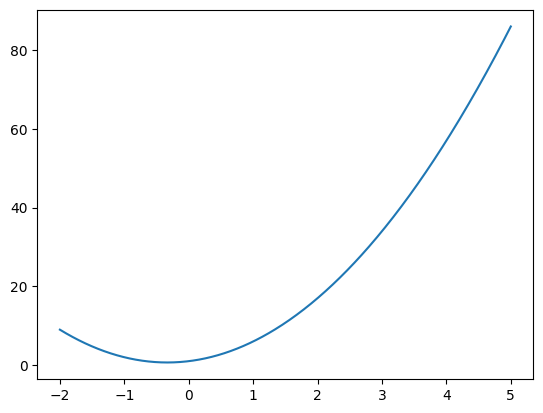

In [67]:
ts = np.linspace(-2, 5, 500)

xs = poly(ts, [1, 2, 3])

plt.plot(ts, xs)

In [93]:
def loss(theta):
    fa = lambda t: poly(t, theta)
    ts = np.linspace(0, 2, 500)
    return np.sum(res(ts, 0.5, fa, dt=0.001))

print(f'Test loss: {loss([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}')

result = sp.optimize.minimize(loss, x0=[1, 1, 1, 1, 1, 1])
result

Test loss: 248522312179.10727


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.5639723538785357e-08
        x: [ 8.094e-01 -4.047e-01  1.012e-01 -1.681e-02  2.005e-03
            -1.421e-04]
      nit: 10
      jac: [-1.561e-06  6.230e-07 -4.479e-07 -4.891e-07 -1.069e-06
            -2.170e-06]
 hess_inv: [[ 8.047e-01 -3.844e-01 ... -4.030e-02  7.694e-03]
            [-3.844e-01  2.067e-01 ... -2.232e-02  3.797e-03]
            ...
            [-4.030e-02 -2.232e-02 ...  1.709e-01 -3.367e-02]
            [ 7.694e-03  3.797e-03 ... -3.367e-02  6.736e-03]]
     nfev: 112
     njev: 16

In [94]:
result.x

array([ 8.09434665e-01, -4.04721300e-01,  1.01180233e-01, -1.68096245e-02,
        2.00529527e-03, -1.42072279e-04])

In [95]:
loss(result.x)

1.5639723538785357e-08

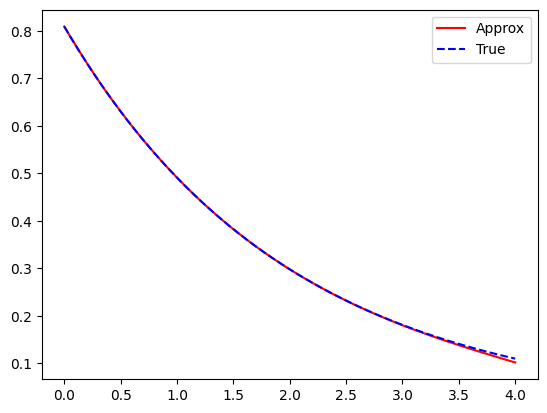

In [98]:
ts = np.linspace(0, 4, 500)

xs = poly(ts, result.x)

xs_gt = xs[0]*np.exp(-0.5*ts)

plt.plot(ts, xs, 'r-', label='Approx')
plt.plot(ts, xs_gt, 'b--', label='True')
plt.legend()

# Euler method

To solve

$$\frac{d y}{d x} = f(x, y)$$

The solution will be in the form:

$$y_{i+1} = y_i + \phi h$$

where $\phi$ is the estimated slope and $h$ is the step size.

Euler method:

$$\phi = \frac{d y}{d x}(x_i) = f(x_i, y_i)$$

Therefore,

$$y_{i+1} = y_i + f(x_i, y_i) h$$

## Example

$$\frac{d C}{d x} = -0.5 C$$

* I.C. $C(0) = 3$

MSE:  1.01431454459679e-06


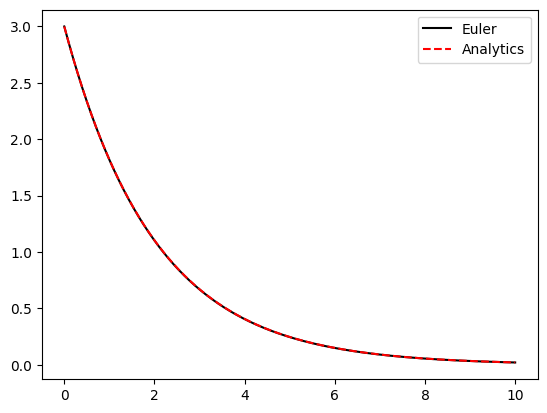

In [66]:
h = 0.01
N = 1000

C = 3
Cs = [C]

for n in range(N):
    C = C - 0.5 * C * h

    Cs.append(C)

xs = np.linspace(0, N*h, N)
plt.plot(xs, Cs[:N], 'k-', label='Euler')

Ana = lambda x: 3 * np.exp(-0.5*x)

Anas = Ana(xs)

plt.plot(xs, Anas, 'r--', label='Analytics')

print('MSE: ', np.mean( (Anas - np.array(Cs[:N]))**2 ))

plt.legend()

# Heun

* $y_{i+1}^0 = y_i + f(x_i, y_i) h$
* $y_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y_{i+1}^0)}{2} h$

MSE:  4.527407086135463e-07


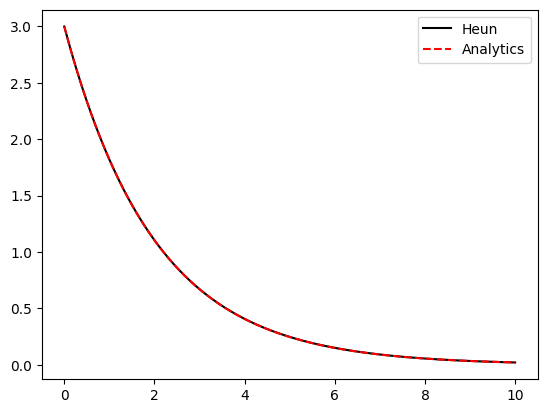

In [67]:
h = 0.01
N = 1000

C = 3
Cs = [C]

for n in range(N):
    C0 = C - 0.5 * C * h 
    C = C + (-0.5*C + -0.5*C0)/2 * h

    Cs.append(C)

xs = np.linspace(0, N*h, N)
plt.plot(xs, Cs[:N], 'k-', label='Heun')

Ana = lambda x: 3 * np.exp(-0.5*x)

Anas = Ana(xs)

plt.plot(xs, Anas, 'r--', label='Analytics')

print('MSE: ', np.mean( (Anas - np.array(Cs[:N]))**2 ))

plt.legend()

# Backward Euler

Backward or implicit Euler

$$y_{i+1} = y_i + \frac{d y_{i+1} }{d x} h$$

E.g., $\frac{d y}{d x} = - a y$

* $y_{i+1} = y_i - a y_{i+1} h$

* $y_{i+1} = \frac{y_i}{1 + a h}$

MSE:  5.486441709297038e-06


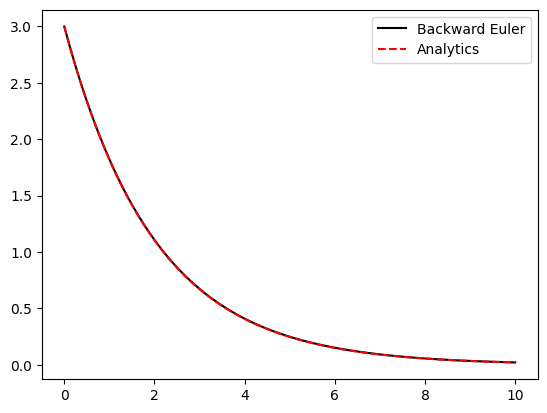

In [68]:
h = 0.01
N = 1000

C = 3
Cs = [C]

for n in range(N):
    C = C/(1 + 0.5*h)

    Cs.append(C)

xs = np.linspace(0, N*h, N)
plt.plot(xs, Cs[:N], 'k-', label='Backward Euler')

Ana = lambda x: 3 * np.exp(-0.5*x)

Anas = Ana(xs)

plt.plot(xs, Anas, 'r--', label='Analytics')

print('MSE: ', np.mean( (Anas - np.array(Cs[:N]))**2 ))

plt.legend()

# A First Course in The Finite Element Method, Daryl L. Logan

## 13.1

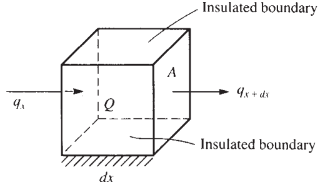

By conservation of energy, we have

$$E_{in} + E_{generated} = \Delta U + E_{out}$$

or

$$q_x A dt + Q A dx dt = \Delta U + q_{x + dx} A dt$$

where
* $E_{in}$ is the energy entering the control volume, in units of joules (J) or kWh
* $\Delta U$ is the change in stored energy, in units of kWh
* $q_x$ is the heat conducted (heat flux) into the control volume at surface edge $x$, in units of $kW/m^2$
* $q_{x + dx}$ is the heat conducted out of the control volume at the surface edge $x + dx$.
* $t$ is time, in $s$.
* $Q$ is the internal heat source (heat generated per unit time per unit volume is positive), in $kW/m^3$ (a heat sink, heat drawn out of the volume, is negative).
* $A$ is the cross-sectional area perpendicular to heat flow $q$, in $m^2$.

By Fourier's law of heat conduction,

$$q_x = -K_{xx} \frac{dT}{dx}$$

where
* $K_{xx}$ is the thermal conductivity in the $x$ direction, in $kW/(m \cdot \;^\circ C)$.
* $T$ is the temperature, in $\;^\circ C)$.
* $dT/dx$ is the temperature gradient, in $\;^\circ C/m$.


Similarly,

$$q_{x + dx} = -K_{xx} \frac{dT}{dx}\bigg|_{x + dx}$$

The gradient is evaluated at $x + dx$.

The change in stored engergy can be expressed by

\begin{align}
\Delta U &= \mbox{specific heat} \times \mbox{mass} \times \mbox{change in temperature}
\\
&= c (\rho A dx) dT
\end{align}

where
* $c$ is the specific heat in $kW \cdot h/(kg \cdot \;^\circ C)$,
* $\rho$ is the mass density in $kg/m^3$.

Work the math,

\begin{align}
q_x A dt + Q A dx dt &= \Delta U + q_{x + dx} A dt
\\
\frac{q_x - q_{x + \partial x}}{\partial x} + Q &= c \rho \frac{\partial T}{\partial t}   
\end{align}

Recall
$\lim_{dx \rightarrow 0} \frac{q_{x + dx} - q_x}{dx} = \frac{d q_x}{d x}$
* $\frac{q_{x + dx} - q_x}{dx} \approx \frac{d q_x}{d x}$

Hence,

\begin{align}
-\frac{\partial q_x}{\partial x} + Q &= c \rho \frac{\partial T}{\partial t}
\\
\frac{\partial \;}{\partial x}\left( K_{xx} \frac{\partial T}{\partial x}
\right) + Q &= c \rho \frac{\partial T}{\partial t}
\end{align}

For steady state ($\frac{dT}{dt} = 0$) and constant thermal conductivity ($K_{xx}$ is constant),

$$ K_{xx} \frac{d^2 T}{d x^2}
 + Q = 0$$

The boundary conditions are of the form
* $T = T_B$ on $S_1$
* $q_x^\ast = - K_{xx} \frac{dT}{dx}$

where
* $T_B$ is a known boundary temperature
* $S_1$ is a surface where the temperature is known
* $q_x^\ast$ is a known heat flux
* $S_2$ is a surface where the heat flux is known.

## Example 13.3

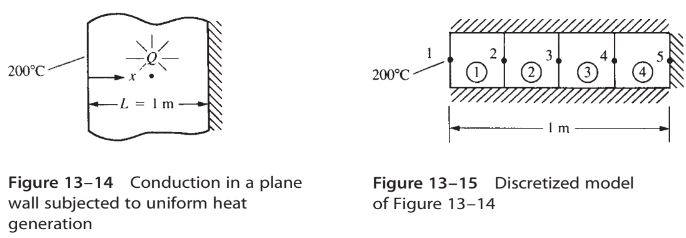

The plane wall is 1 m thick. The left surface of the wall ($x = 0$) is maintained at a constant temperature of $200 \;^\circ C$, and the right surface ($x = L = 1$ m) is insulated.

The thermal conductivity is $K_{xx} = 25 W/(m \cdot \;^\circ C)$ and there is uniform generation of heat inside the wall of $Q = 400 W/m^3$.

Determine the temperature distribution through the wall thickness.

### Solution

Galerkin's weighted residual method

1. Governing equation $k \frac{d^2 T}{d x^2} + Q = 0$ .

2. Weak form: if the governing equation holds, the weak form also holds.

  $$\int_0^L w(x) \left( k \frac{d^2 T}{d x^2} + Q \right) dx = 0$$

  where $w(x)$ is called a shape function.

3. Apply integration by parts: $\int u d v = u v - \int v du$ .

  \begin{align}
  \int_0^L w(x) \left( k \frac{d^2 T}{d x^2} + Q \right) dx &= 0
  \\
  \int_0^L w(x) k \frac{d^2 T}{d x^2} dx+ \int_0^L w(x) Q  dx &= 0
  \\
  \left( w(x) \cdot k \frac{d T}{d x} \right)\bigg|_0^L - \int_0^L k \frac{d T}{d x} \frac{d w(x)}{d x} dx + \int_0^L w(x) Q  dx &= 0
  \end{align}


4. Discretize the subject into elements

5. Account for the boundary conditions

6. Vectorize the relation $[K] \{T\} = \{Q\}$ .

#### Discretization

Here, for this 1d case,
* the element is just a section $d x$;
* the number of elements is chosen to be $N = 4$ (as shown in the picture);
* the shape function $w(x)$ is chosen to be piecewise linear
  * $w(x) = w_i$ for $x_i \le x < x_i + d x$, $i = 1, \ldots, N+1$.
  * $x_1 = 0$ and $x_{N+1} = L$.





##### Term 1

$\int_0^L w(x) Q dx = Q \int_0^L w(x) dx$
  * $\int_0^L w(x) dx$ : area under curve and since we choose $w(x)$ to be piecewise linear, the area is a sum of trazoidal areas:
  
  $Q \int_0^L w(x) dx \approx Q \left( \Delta x (w_1 + w_2)/2 + \Delta x (w_2 + w_3)/2  + \Delta x (w_3 + w_4)/2 + \Delta x (w_4 + w_5)/2 \right)$
  
  * Hence, $Q \int_0^L w(x) dx \approx Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4 + w_5/2 \right)$


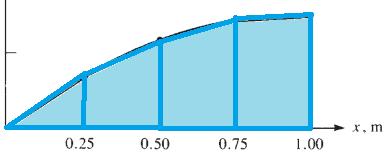

##### Term 2

$w(x) \cdot k \frac{dT}{dx}\bigg|_0^L$
  * $w(x) \cdot k \frac{dT}{dx}\bigg|_0^L = w(x) \cdot k \frac{dT}{dx}\bigg|_{x=L} - w(x) \cdot k \frac{dT}{dx}\bigg|_{x=0}$
  * $w(x) \cdot k \frac{dT}{dx}\bigg|_0^L \approx w_5 \cdot k \frac{dT}{dx}\bigg|_{x=L} - w_1 \cdot k \frac{dT}{dx}\bigg|_{x=0}$


##### Term 3

$\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx$
  * Recall $\frac{dw}{dx} \approx \frac{w_{i+1} - w_i}{\Delta x}$ and $\frac{dT}{dx} \approx \frac{T_{i+1} - T_i}{\Delta x}$  

Hence,
\begin{align}
\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx
&\approx \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) + (w_5 - w_4)(T_5 - T_4)\right)
\end{align}

##### Discretized equation

\begin{align}
Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4 + w_5/2 \right)
+ w_5 \cdot k \frac{dT}{dx}\bigg|_{x=L} - w_1 \cdot k \frac{dT}{dx}\bigg|_{x=0}
\\
- \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) + (w_5 - w_4)(T_5 - T_4)\right) = 0
\end{align}

Rearrange in terms of $w_1, \ldots, w_5$ and we get

\begin{align}
& w_1 \left( \frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=0} - \frac{k}{ \Delta x} (T_1 - T_2) \right)
\\
+ & w_2 \left( Q \Delta x - \frac{k}{\Delta x} (- T_1 + 2 T_2 - T_3) \right)
\\
+ & w_3 \left( Q \Delta x - \frac{k}{\Delta x} (- T_2 + 2 T_3 - T_4) \right)
\\
+ & w_4 \left( Q \Delta x - \frac{k}{\Delta x} (-T_3 + 2 T_4 - T_5) \right)
\\
+ & w_5 \left( \frac{Q \Delta x}{2} + k \frac{dT}{dx}\bigg|_{x=L} - \frac{k}{\Delta x} (- T_4 + T_5) \right) = 0
\end{align}


Since $w(x)$ is arbitrary,
the equation above has to be true for any set of $w_i$'s.

Therefore,

\begin{align}
\frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=0} - \frac{k}{ \Delta x} ( T_1 - T_2) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (- T_1 + 2 T_2 - T_3) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (- T_2 + 2 T_3 - T_4) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (-T_3 + 2 T_4 - T_5) & = 0
\\
\frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=L} - \frac{k}{\Delta x} (- T_4 + T_5) & = 0
\end{align}

##### Vectorize

Rearrange it in terms of $T_i$'s and vectorize it.

\begin{align}
-\frac{k}{\Delta x} \begin{bmatrix}
1 & -1 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
k \frac{d T}{d x}\bigg|_{x=0} - \frac{Q \Delta x}{2}
\\
- Q \Delta x \\
- Q \Delta x \\
- Q \Delta x \\
-k \frac{d T}{d x}\bigg|_{x=L} - \frac{Q \Delta x}{2}
\end{bmatrix}
\end{align}

Given the boundary conditions,
* $T_1 = 200$
* Insulated at $x=L$, $k\frac{dT}{dx}\bigg|_{x = L} = 0$

* $k = 25 W/(m \cdot \;^\circ C)$.
* $\Delta x = 1/4 = 0.25 m$.
* $Q = 400 W/m^3$.

Hence,
* $\frac{k}{\Delta x} = 100 \; W/(m^2 \;^\circ C)$ .

* $Q \Delta x = 100 \; W/m^2$ .

Recall the governing equation and its root,
* the governing $k\frac{d T}{d x} + Q = 0$
* and its root $q_x A dt + Q A dx dt = \Delta U + q_{x + dx} A dt$
  * $\Delta U = c (\rho A dx) dT$

In both, we have removed $A$.

Anyhow, the final equations become:

\begin{align}
-100 \begin{bmatrix}
1 & -1 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
k \frac{d T}{d x}\bigg|_{x=0} - 50
\\
- 100 \\
- 100 \\
- 100 \\
- 50
\end{bmatrix}
\end{align}

Since we do not have $k \frac{d T}{d x}\bigg|_{x=0}$ yet
and we know $T_1$,
then we can remove the first equation and put $T_1$'s value in.

\begin{align}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
200 \\
1 + 1(200)\\
1 \\
1 \\
0.5
\end{bmatrix}
\end{align}

Solve for $T_2, \ldots, T_5$ from

\begin{align}
\begin{bmatrix}
2 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
201\\
1 \\
1 \\
0.5
\end{bmatrix}
\end{align}

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Kmat = np.array([[2, -1, 0, 0],
                 [-1, 2, -1, 0],
                 [0, -1, 2, -1],
                 [0, 0, -1, 1]])

Qmat = np.array([201, 1, 1, 0.5]).reshape((-1,1))

Tmat = np.linalg.solve(Kmat, Qmat)

print(Tmat)

[[203.5]
 [206. ]
 [207.5]
 [208. ]]


In [7]:
len(Tmat)

4

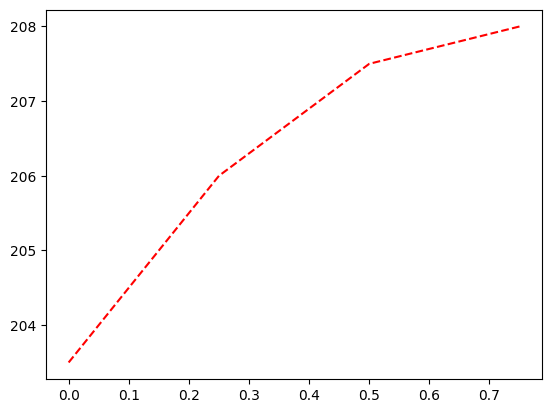

In [8]:
xs = [0.25*i for i in range(len(Tmat))]

plt.plot(xs, Tmat, 'r--')


#### Discussion

Why do we estimate
$\int_0^L w(x) Q  dx$ with trazoidal area,
but $\int_0^L k \frac{d T}{d x} \frac{d w(x)}{d x} dx$ with simple rectangular area?


* Recall $w(x)$ is piecewise linear.
  * Its value $w(x)$ is better estimated with trazoidal.
  * But derivative of linear is a constant, i.e., $\frac{d w(x)}{d x}$ is constant over the section.
    * Also, the way I use trazoidal:
       * $a(0) \equiv a_1 \approx \frac{(w_2 - w_1)(T_2 - T_1)}{\Delta x^2}$
       * $a(dx) \equiv a_2 \approx \frac{(w_3 - w_2)(T_3 - T_2)}{\Delta x^2}$     
       * ...
       * $\frac{a_1 + a_2}{2} \Delta x$, ...
    * This is like averaging the derivative of 2 sections.
    * With piecewise linear, derivative is constant over a section. Thus, using the next section derivative to average with is likely to make the approximation worse.
      * However, if the temperature changes fast, this may help! as it catches the change better.


### Exact solution

\begin{align}
k \frac{d^2 T}{d x^2} + Q &= 0
\\
\ddot{T} = -\frac{Q}{k}
\end{align}

Let
* $T(x) = e^{\lambda x}$
* $\dot{T}(x) = \lambda e^{\lambda x}$
* $\ddot{T}(x) = \lambda^2 e^{\lambda x}$

1. Homogeneous: $\ddot{T} = 0$

$\lambda = 0$

* $T_1 = e^{0 x} = 1$

* $T_2 = x$

$T_h(x) = c_1 + c_2 x$

2. Particular: $\ddot{T} = -\frac{Q}{k}$

* Basic rule: $T_p(t) = K$
* Modification rule: $T_p(t) = K x^2$

Hence
* $T_p = K x^2$
* $\dot{T}_p = 2 K x$
* $\ddot{T}_p = 2 K$

* $2 K = - \frac{Q}{k}$
* $K = -\frac{Q}{2 k}$


3. Boundary conditions

* $T(x) = c_1 + c_2 x - \frac{Q}{2 k} x^2$
* $T(0) = T_0$
* $\dot{T}(L) = 0$

Hence,
\begin{align}
c_1 &= T_0
\\
c_2 - \frac{Q}{k} L &= 0
\end{align}

* $c_1 = T_0$
* $c_2 = \frac{Q}{k} L$

$$T(x) = T_0 + \frac{Q}{k} L x - \frac{Q}{2 k} x^2$$

In [4]:
k = 25
Q = 400
To = 200
L = 1

def temp(x, k, Q, To, L):
    Qk = Q/k
    return To + Qk * L * x - Qk/2 * x**2

In [14]:
Tmat = np.r_[[[To]], Tmat]
Tmat

array([[200. ],
       [203.5],
       [206. ],
       [207.5],
       [208. ]])

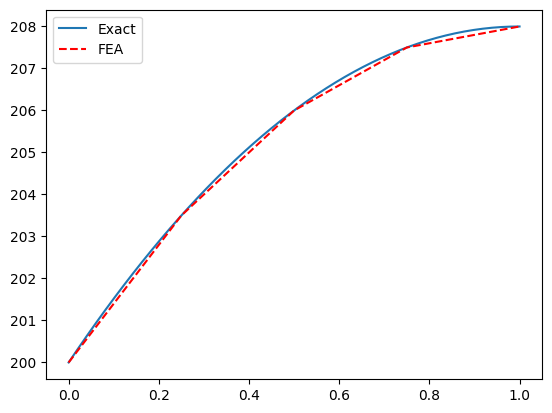

In [17]:
xs = np.linspace(0, 1, 50)
plt.plot(xs, temp(xs, k, Q, To, L))

xs = [0.25*i for i in range(len(Tmat))]
plt.plot(xs, Tmat, 'r--')

plt.legend(['Exact', 'FEA'])

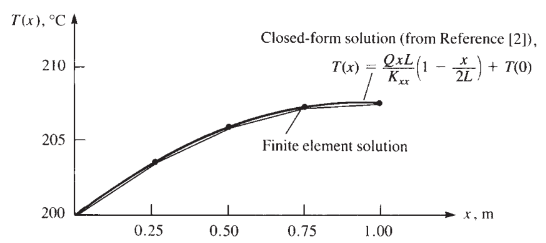

# EdX: Cornell's Introduction to Simulation

### 1-D Heat distribution on an isotropic iron bar

* Given $k \frac{d^2 T}{d x^2} + Q = 0$ for $0 \leq x \leq L$, solve for $T(x)$.
* Boundary conditions
  * $T(0) = T_0$
  * $q(L) = q_L = - k \frac{dT}{dx}|_{x=L}$
* $T$ : temperature, $q$ heat flow per unit area, "heat flux"

My note: $q = - k \frac{dT}{dx}$ means:
  * along $x$, negative heat flux $q < 0$ takes heat in and temperature rises.
  * along $x$, positive heat flux $q > 0$ takes heat out and temperature gets lower.




# FEA

To solve the problem,
* Direct method: exact solution -> Calculus
* Galerkin: $[K] \{ T \} = \{ Q \}$



## Derive a weak form
* If $k \frac{d^2 T}{d x^2} + Q = 0$,
  * then $\int_0^L w(x) \cdot \left(k \frac{d^2 T}{d x^2} + Q\right) dx = 0$ also holds for an arbitrary function $w(x)$.
* Let $w(x)$ be an arbitrary piecewise polynomial function.

With integration by parts,
$\int_0^L w(x) \cdot \left(k \frac{d^2 T}{d x^2} + Q\right) dx = 0$
can be written as

$$w(x) \cdot k \frac{dT}{dx}|_0^L - \int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx + \int_0^L w(x) Q dx  = 0$$


## Discretize the calculation

Discretize $x \in [0, L]$ into $M$ parts, e.g., 3 parts (4 nodes: 1, 2, 3, 4)

Consider each term

* $w(x) \cdot k \frac{dT}{dx}|_0^L$
  * $w(x) \cdot k \frac{dT}{dx}|_0^L = w(x) \cdot k \frac{dT}{dx}|^{x=L} - w(x) \cdot k \frac{dT}{dx}|^{x=0})$
  * $w(x) \cdot k \frac{dT}{dx}|_0^L \approx w_4 \cdot k \frac{dT}{dx}|^{x=L} - w_1 \cdot k \frac{dT}{dx}|^{x=0}$
* $\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx$
  * Recall $\frac{dw}{dx} = \frac{w_{i+1} - w_i}{\Delta x}$ and $\frac{dT}{dx} = \frac{T_{i+1} - T_i}{\Delta x}$
  * Hence (the area under curve), $\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx \approx \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) \right)$
* $\int_0^L w(x) Q dx = Q \int_0^L w(x) dx$
  * $\int_0^L w(x) dx$ : area under curve and since we choose $w(x)$ to be piecewise linear, the area is a sum of trazoidal areas: $Q \int_0^L w(x) dx \approx Q \left( \Delta x (w_1 + w_2)/2 + \Delta x (w_2 + w_3)/2  + \Delta x (w_3 + w_4)/2 \right)$
  * Hence, $Q \int_0^L w(x) dx \approx Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4/2 \right)$


Substitute each term with its discrete approximation

$$w_4 \cdot k \frac{dT}{dx}|^{x=L} - w_1 \cdot k \frac{dT}{dx}|^{x=0} - \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) \right) + Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4/2 \right) = 0$$

Then, rearrange to

$w_1 \cdot (-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} - k \frac{dT}{dx}|^{x=0})$

$+ w_2 \cdot (\frac{k}{\Delta x} T_1 - 2 \frac{k}{\Delta x} T_2 + \frac{k}{\Delta x} T_3 + Q \Delta x)$

$+ w_3 \cdot (\frac{k}{\Delta x} T_2 - 2 \frac{k}{\Delta x} T_3 + \frac{k}{\Delta x} T_4 + Q \Delta x)$

$+ w_4 \cdot (\frac{k}{\Delta x} T_3 - \frac{k}{\Delta x} T_4 + \frac{Q \Delta x}{2} + k \frac{dT}{dx}|^{x=L}) = 0$


Since this has to work for any arbitrary $w(x)$ (i.e., $w_1, ..., w_n$), therefore

$-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} - k \frac{dT}{dx}|^{x=0} = 0$

$\frac{k}{\Delta x} T_1 - 2 \frac{k}{\Delta x} T_2 + \frac{k}{\Delta x} T_3 + Q \Delta x = 0$

$\frac{k}{\Delta x} T_2 - 2 \frac{k}{\Delta x} T_3 + \frac{k}{\Delta x} T_4 + Q \Delta x = 0$

$\frac{k}{\Delta x} T_3 - \frac{k}{\Delta x} T_4 + \frac{Q \Delta x}{2} + k \frac{dT}{dx}|^{x=L} = 0$


Recall the boundary conditions
* $k \frac{dT}{dx}|^{x=L} = -q_L$ (known)
* $T_1 = T_0$ (known)


With $T_1$ known, we can form a system of equations to solve for 3 unknown variables, $T_2, T_3, T_4$.



$\begin{bmatrix} -2 \frac{k}{\Delta x} & \frac{k}{\Delta x} & 0 \\ \frac{k}{\Delta x} & -2 \frac{k}{\Delta x} & \frac{k}{\Delta x} \\ 0 & \frac{k}{\Delta x} &  -\frac{k}{\Delta x}
\end{bmatrix}
\cdot \begin{bmatrix} T_2 \\ T_3 \\ T_4 \end{bmatrix}$
$=$
$\begin{bmatrix} -\frac{k}{\Delta x} T_0 -Q \Delta x \\
-Q \Delta x \\
- \frac{Q \Delta x}{2} + q_L
\end{bmatrix}$


# Code

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
k = 1.2
Q = 200 # Watt

T0 = 50 # C
qL = 18 # C/m

Dx = 0.02 # m

$[K] \{T\} = \{Q\}$

In [ ]:
kx = k/Dx
Qx = Q*Dx

Kmat = np.array([[-2*kx, kx, 0],
                 [kx, -2*kx, kx],
                 [0, kx, -kx]])
Qmat = np.array([[-kx * T0 - Qx],
                 [-Qx],
                 [-Qx + qL]])

In [ ]:
Tmat = np.linalg.solve(Kmat, Qmat)

In [ ]:
Tmat

array([[49.9       ],
       [49.73333333],
       [49.5       ]])

In [ ]:
T2, T3, T4 = Tmat.reshape(-1,)

Once we have all $T_1, ..., T_4$ known, we can solve for $q_0 \equiv -k \frac{dT}{dx}|^{x=0}$.


---



$-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} = k \frac{dT}{dx}|^{x=0}$

or

$q_0 = \frac{k}{\Delta x} T_1 - \frac{k}{\Delta x} T_2 - \frac{Q \Delta x}{2}$


In [ ]:
T1 = T0
q0 = kx * T1 - kx * T2 - Qx/2

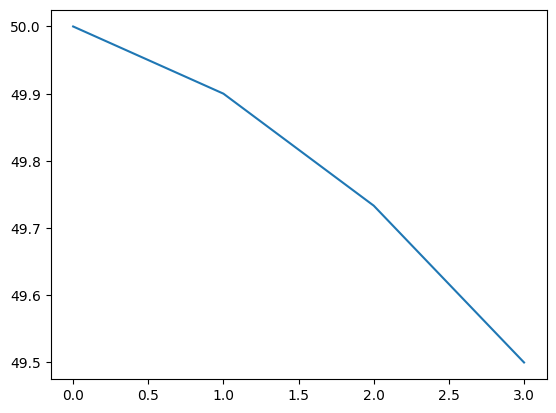

In [ ]:
plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

Recall
* $q_0 \equiv -k \frac{dT}{dx}|^{x=0}$

* $q_L \equiv -k \frac{dT}{dx}|^{x=L}$




* When $q_0 > 0 $ , $T$ declines as moving inside: $x = 0$ to $0^+$.

* When $q_L > 0 $, $T$ declines as moving outside: $x = L$ to $L^+$
  * or, $T$ increases as moving inside.


# See the interaction

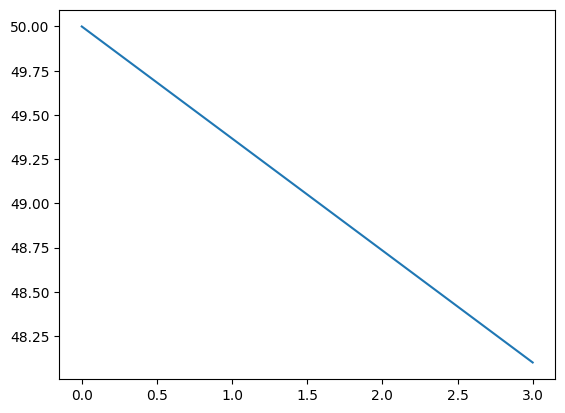

In [ ]:
k = 1.2
Q = 0 # Watt

T0 = 50 # C
qL = 38 # C/m

Dx = 0.02 # m

kx = k/Dx
Qx = Q*Dx

Kmat = np.array([[-2*kx, kx, 0],
                 [kx, -2*kx, kx],
                 [0, kx, -kx]])
Qmat = np.array([[-kx * T0 - Qx],
                 [-Qx],
                 [-Qx + qL]])

Tmat = np.linalg.solve(Kmat, Qmat)

T2, T3, T4 = Tmat.reshape(-1,)
T1 = T0
q0 = kx * T1 - kx * T2 - Qx/2
plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

# Function ```heat_1d```

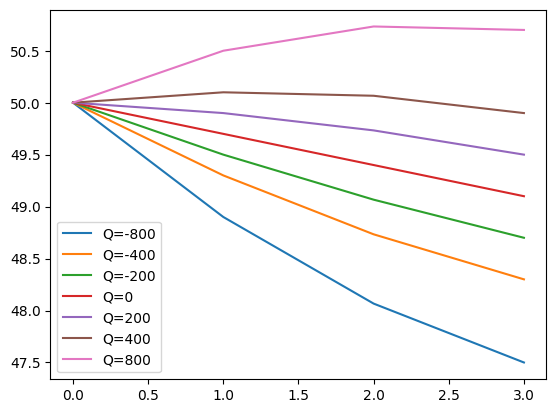

In [ ]:
def heat_1d(k, Q, T0, qL, dx):
    kx = k/dx
    Qx = Q*dx

    Kmat = np.array([[-2*kx, kx, 0],
                    [kx, -2*kx, kx],
                    [0, kx, -kx]])
    Qmat = np.array([[-kx * T0 - Qx],
                    [-Qx],
                    [-Qx + qL]])

    Tmat = np.linalg.solve(Kmat, Qmat)

    T2, T3, T4 = Tmat.reshape(-1,)
    T1 = T0
    q0 = kx * T1 - kx * T2 - Qx/2
    return T1, T2, T3, T4, q0


k = 1.2
Q = 200 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

Qs = [-800, -400, -200, 0, 200, 400, 800]

for Q in Qs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

plt.legend(["Q={}".format(Q) for Q in Qs])

Recall

* $k \frac{d^2 T}{d x^2} + Q = 0$

* $Q = -\frac{\partial T(x,t)}{\partial t}$
  * Q : heat flowing out over time
  * Since we do not plot it over time, this point we cannot discuss.


But, $k \frac{d^2 T}{d x^2} + Q = 0$
or $Q = -k \frac{d^2 T}{d x^2}$
 implies $Q$ controls the curvature of temperature-distance plot.
* $Q > 0$, it should bend down!
* $Q < 0$, it should bend up!


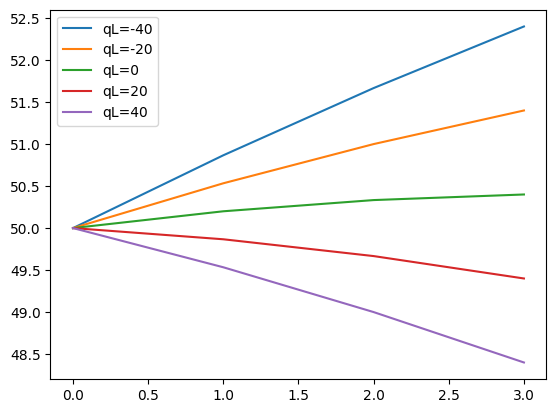

In [ ]:
k = 1.2
Q = 200 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

qLs = [-40, -20, 0, 20, 40]

for qL in qLs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

plt.legend(["qL={}".format(qL) for qL in qLs])

$qL > 0$ "temperature decreases as $x$ increases at the $x = L$ location."

# Reaction

> "Energy is conserved in aggregated."

Given $Q = -k \frac{d^2 T}{d x^2}$
and $q_{x_0} = -k (\frac{d T}{d x})_{x=x_0}$,

$\int_0^L Q dx = q_L - q_0$ .

Hence,

$$Q \cdot \Delta x \cdot n \approx q_L - q_0$$

where $n$ is a number of sections between $x=0$ to $x=L$.





Recall that $q_L$ and $q_0$ are only the approximation of the derivatives.

These might be the source of error: reaction $\neq 0$.

Reaction= 6.0 - 7.000000000000007 = -1.0000
Reaction= 6.0 - 7.000000000000011 = -1.0000
Reaction= 6.0 - 7.000000000000002 = -1.0000
Reaction= 6.0 - 6.9999999999999964 = -1.0000
Reaction= 6.0 - 6.999999999999986 = -1.0000


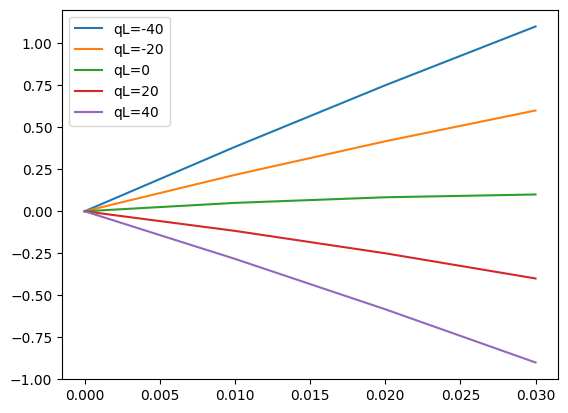

In [ ]:
k = 1.2
Q = 200 # Watt
T0 = 0 # C
qL = 18 # C/m
Dx = 0.01 # m

qLs = [-40, -20, 0, 20, 40]

for qL in qLs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([i*Dx for i in range(4)], [T1, T2, T3, T4])

    LHS = Q*3*Dx   # 4 nodes = 3 sections for 1D case
    RHS = qL - q0
    print('Reaction= {} - {} = {:.4f}'.format(LHS, RHS, LHS - RHS))

plt.legend(["qL={}".format(qL) for qL in qLs])



# Check against exact solution

$k \frac{d^2 T}{d x^2} + Q = 0$


Standard form $a_2 \frac{d^2 T}{d x^2} + a_1 \frac{d T}{d x} + a_0 T = f(x)$
* When $a_1^2 > 4 a_0 a_2$, $T_h = A_1 e^{s_1 x} + A_2 e^{s_2 x}$
  * where $s_1, s_2 = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_0 a_2}}{2 a_2}$
* When $a_1^2 = 4 a_0 a_2$, $T_h = A_1 e^{s x} + A_2 x e^{s x}$
  * where $s = - \frac{a_1}{2 a_2}$
* When $a_1^2 < 4 a_0 a_2$, $x_h = e^{-\alpha x} \left( A_1 \cos(\beta x) + A_2 \sin(\beta x) \right)$
  * where $\alpha = \frac{a_1}{2 a_2}$ and $\beta = \frac{\sqrt{4 a_0 a_2 - a_1^2}}{2 a_2}$

And, if $f(x) = K$ and $a_0 = 0$ and $a_1 = 0$, then

$$T_p = B_2 x^2 + B_1 x + B_0$$.

Since $a_1 = 0$ and $a_0 = 0$, this makes $a_1^2 = 4 a_0 a_2$
and

$$T_h = A_1 e^{s x} + A_2 x e^{s x}$$

And, with $s = - \frac{0}{2 k} = 0$,

$$T_h = A_1 + A_2 x$$

Hence,

$$ T = T_h + T_p = A x^2 + B x + C$$

With
* $-k \frac{d^2 T(x)}{d x^2} = Q$ for every $x$,
* $T(x = 0) = T_0$, and
* $-k \frac{d T(x)}{d x}|^{x = L} = q_L$


Hence,
* $-2 k A = Q$, then $A = - \frac{Q}{2 k}$
* $T(0) = C = T_0$
* $-k(2 A L + B) = q_L$
  * Substitute $A$, we have
  $Q L - k B = q_L$ and $B = \frac{Q \cdot L - q_L}{k}$


In [ ]:
def exact_heat_1d(x, Q, k, L, qL, T0):
    A = - Q/(2*k)
    B = (Q*L - qL)/k
    C = T0

    Tx = A*x**2 + B*x + C
    return Tx

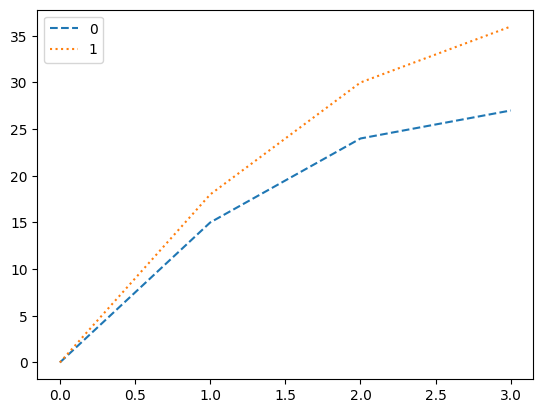

In [ ]:
k = 1
Q = 0 # Watt
T0 = 0 # C
qL = 0 # C/m
Dx = 1 # m
N = 3
L = N * Dx

xs = Dx * np.arange(N+1)

# Qs = np.array([-800, -200, 0, 200, 800])
Qs = np.array([6])
for Q in Qs:
    eT = exact_heat_1d(xs, Q, k, L, qL, T0)
    # plt.plot(xs, eT, 'kx--')
    plt.plot(xs, eT, '--')

    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    # plt.plot(xs, [T1, T2, T3, T4], 'ro:')
    plt.plot(xs, [T1, T2, T3, T4], ':')


plt.legend(['{}'.format(i) for i in range(2*len(Qs))])

This confuses me.

I'll take a BREAK HERE!!!

Since $a_1 = 0$ and $a_0 = 0$, this makes $a_1^2 = 4 a_0 a_2$
and

$$T = A_1 e^{s x} + A_2 x e^{s x} + B$$

where

$$s = - \frac{0}{2 k} = 0$$

That is, $T = A x + C$

With initial condition,

* $T(x = 0) = T_0$, then $C = T_0$

* $-k \frac{d T}{d x}|^{x = L} = q_L$, then $A = -q_L/k$

Therefor,

$$T(x) = -\frac{q_L}{k} x + T_0$$

In [ ]:
def exact_heat1d(x, k, qL, T0):
  Tx = - qL/k * x + T0
  return Tx

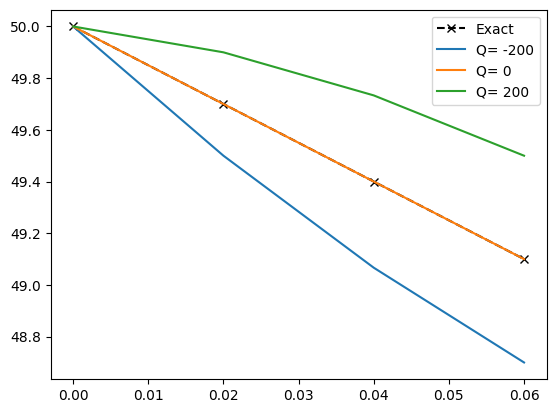

In [ ]:
k = 1.2
Q = 0 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

xs = Dx * np.arange(4)
eT = exact_heat1d(xs, k, qL, T0)
plt.plot(xs, eT, 'kx--')

Qs = np.array([-200, 0, 200])
for Q in Qs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot(xs, [T1, T2, T3, T4])

plt.legend(['Exact'] + ['Q= {}'.format(Q) for Q in Qs])

# To improve

* Increase # elements
* Increase the order of the polynomial (more nodes within an element)

## Effect of having more elements

## Effect of having higher-order polynomial

# Appendix


## Heat

E.g., What quantity of heat is required to raise the temperature of 500 g of water from $20$ C to $90$ C?

The specific heat capacity of water is $4.18$ J/(g C).

\begin{align}
Q &= m C \Delta T
\\
&= (500) \cdot (4.18) \cdot (90 - 20)
\end{align}

That is, $Q = 146300$ J.


In [ ]:
500 * 4.18 * 70

146300.0

## Heat flux

> "a flow of energy per unit area per unit time."

Heat flux $q$ has a unit in $W/m^2$.

# End